In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# only get data analyst jobs in the US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US['salary_year_avg'].sample(10)

425037     90000.000000
301680     57500.000000
380522     62500.000000
163333     63000.000000
212434    120000.000000
102449     86093.757812
164505     75000.000000
475192    121065.000000
530253     90000.000000
425260     75000.000000
Name: salary_year_avg, dtype: float64

<Axes: >

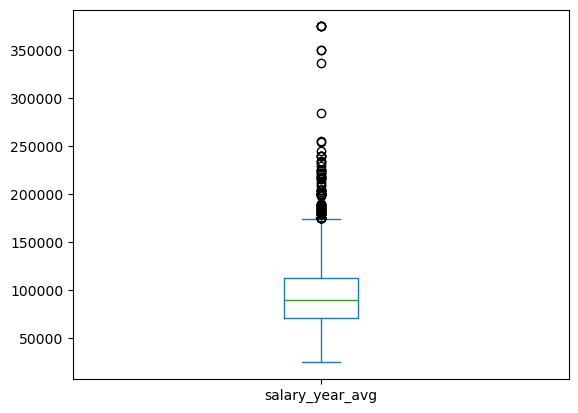

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x25264d6b050>,
 'caps': [<matplotlib.lines.Line2D at 0x25264d7c550>,
 'boxes': [<matplotlib.lines.Line2D at 0x25264d6a710>],
 'medians': [<matplotlib.lines.Line2D at 0x25264d7da10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25264d7e350>],
 'means': []}

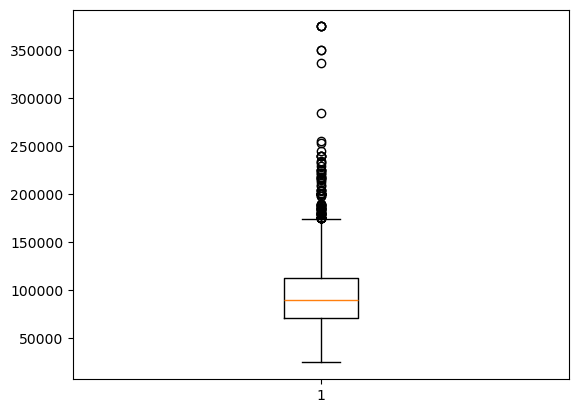

In [5]:
# alt way:
plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

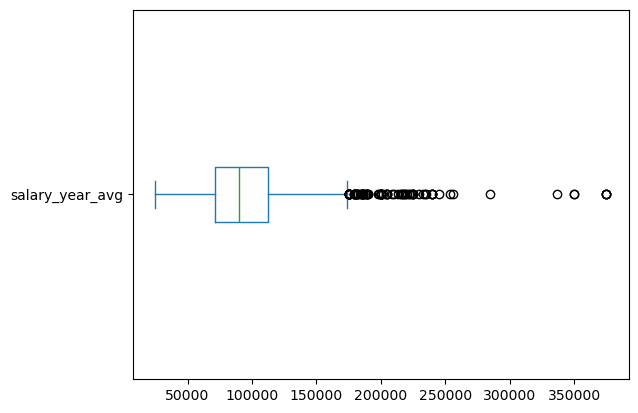

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert = False)

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
163256,Data Engineer,Data Engineer QA Level 3,"Blue Ash, OH",via LinkedIn,Contractor,False,"Florida, United States",2023-08-18 15:11:32,True,True,United States,None,NaN,NaN,Kforce Inc,None,None
726023,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-12-20 21:06:26,False,False,United States,None,NaN,NaN,Amur,"[sql, nosql, sql server, snowflake, aws, azure...","{'async': ['jira'], 'cloud': ['snowflake', 'aw..."
725554,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-02-21 21:27:10,False,False,United States,None,NaN,NaN,Dice,"[docker, github, gitlab]","{'other': ['docker', 'github', 'gitlab']}"
154495,Data Scientist,Director product data science,"San Jose, CA",via Institute Of Data Jobs,Full-time,False,"California, United States",2023-07-16 08:02:53,False,True,United States,None,NaN,NaN,PayPal,"[sql, r, python, excel, tableau, looker]","{'analyst_tools': ['excel', 'tableau', 'looker..."
222143,Data Analyst,Data Analyst,"Los Angeles, CA",via ZipRecruiter,Full-time,False,"California, United States",2023-08-25 22:01:07,False,False,United States,None,NaN,NaN,DT Professional Services,"[excel, sheets, tableau]","{'analyst_tools': ['excel', 'sheets', 'tableau']}"


In [10]:
df_US.value_counts('job_title_short')

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [11]:
df_US = df_US.dropna(subset = ['salary_year_avg'])
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [18]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']  for job_title in job_titles]

In [16]:
job_list[0]

1        NaN
12       NaN
18       NaN
31       NaN
34       NaN
          ..
785703   NaN
785705   NaN
785715   NaN
785717   NaN
785737   NaN
Name: salary_year_avg, Length: 196075, dtype: float64

C:\Users\prabh\AppData\Local\Temp\ipykernel_33012\986538452.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert=False)


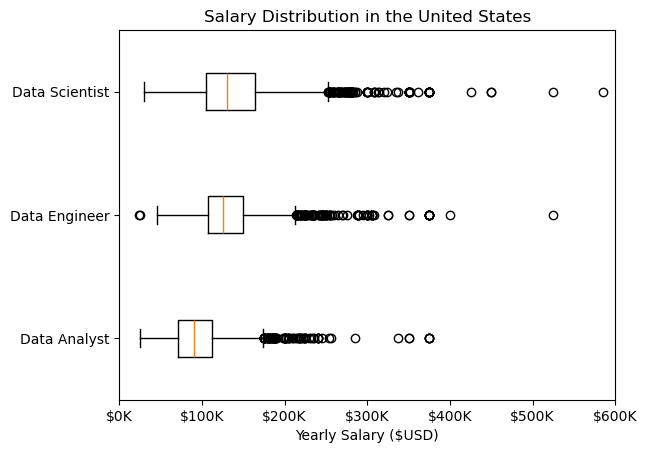

In [24]:
plt.boxplot(job_list, labels = job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()
